In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cleaned_muse_with_english_lyrics_only.csv")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_lyrics"], df["final_emotion"], 
    test_size=0.2, random_state=42, stratify=df["final_emotion"]
)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,3), 
    min_df=2, 
    max_df=0.8,
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [27]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [28]:
model = LinearSVC(class_weight='balanced')

In [29]:
model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       anger       0.17      0.24      0.20       569
        calm       0.16      0.17      0.16      1034
  excitement       0.18      0.15      0.16      1247
        fear       0.09      0.14      0.11       294
         joy       0.23      0.21      0.22      1451
     neutral       0.15      0.16      0.15       952
  reflective       0.18      0.15      0.16      1301
    romantic       0.16      0.22      0.19       734
     sadness       0.23      0.19      0.21      1516

    accuracy                           0.18      9098
   macro avg       0.17      0.18      0.17      9098
weighted avg       0.19      0.18      0.18      9098



              precision    recall  f1-score   support

       anger       0.17      0.24      0.20       569
        calm       0.16      0.17      0.16      1034
  excitement       0.18      0.15      0.16      1247
        fear       0.09      0.14      0.11       294
         joy       0.23      0.21      0.22      1451
     neutral       0.15      0.16      0.15       952
  reflective       0.18      0.15      0.16      1301
    romantic       0.16      0.22      0.19       734
     sadness       0.23      0.19      0.21      1516

    accuracy                           0.18      9098
   macro avg       0.17      0.18      0.17      9098
weighted avg       0.19      0.18      0.18      9098

Confusion Matrix:
 [[136  36  85  35  65  64  53  40  55]
 [ 39 177 118  43 151  80 145 122 159]
 [134 138 191  56 197 126 139 131 135]
 [ 35  30  34  42  26  34  32  16  45]
 [ 82 172 173  61 303 154 164 170 172]
 [123 100  99  52 126 149 101  84 118]
 [ 91 188 144  68 176 134 194 113 193]
 [ 

<Figure size 1200x800 with 0 Axes>

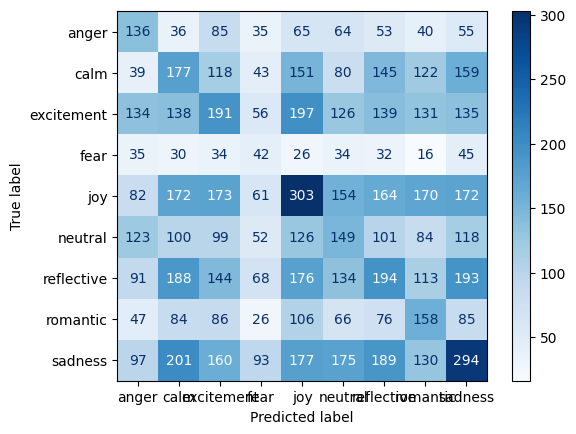

In [30]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(12, 8))  # adjust width x height in inches

# Train model
model.fit(X_train_tfidf, y_train)

# Predict
preds = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(preds_classes)

NameError: name 'preds_classes' is not defined

In [31]:
tfidf.get_feature_names_out()[:1000]


array(['aa', 'aaa', 'aaa aaa', 'aaa aaa aaa', 'aaaah', 'aaah', 'aah',
       'aah aah', 'aah aah aah', 'abandon', 'abandoned', 'abide',
       'ability', 'ablaze', 'able', 'aboard', 'absence', 'absolute',
       'absolutely', 'abstract', 'absurd', 'abuse', 'abused', 'abyss',
       'accept', 'accepted', 'access', 'accident', 'accidental',
       'accidentally', 'according', 'account', 'accused', 'ace', 'ache',
       'achieve', 'aching', 'acid', 'acre', 'across', 'across face',
       'across floor', 'across ocean', 'across room', 'across sea',
       'across sky', 'across water', 'across world', 'act', 'act fool',
       'act like', 'act like dont', 'acted', 'actin', 'actin like',
       'acting', 'acting like', 'action', 'actor', 'actress', 'actual',
       'actually', 'ad', 'adam', 'add', 'addict', 'addicted', 'addiction',
       'address', 'adjust', 'admire', 'admit', 'adore', 'adored',
       'adrenaline', 'adrift', 'advance', 'advantage', 'adventure',
       'advice', 'aeroplane'